In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Replace the path with the correct one if needed
file_path = '/content/drive/MyDrive/Subgraph.csv'

# Define column names

# Read the file into a DataFrame
DF = pd.read_csv(file_path)

# Display the DataFrame
DF.head()

,ID1,ID2
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [ ]:
from google.colab import files
files.upload()  # Select and upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alirezaakhavansafaei","key":"7a1024303e3fdd5f892634f1f6326f03"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d wolfram77/graphs-snap-higgs-twitter -p /content


 92% 111M/120M [00:01<00:00, 107MB/s] 
100% 120M/120M [00:01<00:00, 97.5MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('/content/graphs-snap-higgs-twitter.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [ ]:
import pandas as pd

# Replace the path with the correct one if needed
file_path = '/content/higgs-activity_time.txt'

# Define column names
columns = ['id1', 'id2', 'timestamp', 'action']

# Read the file into a DataFrame
df = pd.read_csv(file_path, sep=' ', header=None, names=columns)

# Display the DataFrame
df.head()

,id1,id2,timestamp,action
0,223789,213163,1341100972,MT
1,223789,213163,1341100972,RE
2,376989,50329,1341101181,RT
3,26375,168366,1341101183,MT
4,376989,13813,1341101192,RT


In [ ]:
import pandas as pd

# Assuming you have already defined Df and df

# Find all unique IDs in Df (ID1 + ID2 set)
unique_ids_set = set(DF['ID1']).union(set(DF['ID2']))

# Filter df to keep only records with valid IDs in id1 or id2
df_filtered = df[df['id1'].isin(unique_ids_set) & df['id2'].isin(unique_ids_set)]

# Display the filtered DataFrame
df_filtered

,id1,id2,timestamp,action
0,223789,213163,1341100972,MT
1,223789,213163,1341100972,RE
7,99258,50329,1341101263,RT
12,75083,84647,1341101732,RT
13,75083,42182,1341101732,MT
...,...,...,...,...
563055,85314,85314,1341705426,MT
563058,9021,80429,1341705452,MT
563059,9021,80429,1341705452,RE
563065,19979,49694,1341705552,MT


In [ ]:
df=df_filtered

In [ ]:
# Function to print a dictionary up to a specified number of records
def print_dictionary(dictionary, limit=100):
    print("{")
    count = 0
    for key, value in dictionary.items():
        if count >= limit:
            break
        print(f"    {key}: {value}")
        count += 1
    print("}")


In [ ]:
# Assuming you have already read the file and have the pandas DataFrame 'df'

# Initialize the dictionaries to store the results
MT_dict = {}
RT_dict = {}
RE_dict = {}
merged_dict = {}
total_dict = {}

# Set the number of records to process before printing the progress
records_to_print = 1000
processed_records = 0
total_records = len(df)

# Loop over the DataFrame
for index, row in df.iterrows():
    if row['action'] == 'MT':
        key = row['id2']
        value = row['id1']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in MT_dict:
            MT_dict[key] = []

        # Append the value to the list
        MT_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged_dict:
            merged_dict[key] =[]

        merged_dict[key].append(f"MT-{value}")
        if key not in total_dict:
            total_dict[key] =[]

        total_dict[key].append(value)
    elif row['action'] == 'RT':
        key = row['id2']
        value = row['id1']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in RT_dict:
            RT_dict[key] = []

        # Append the value to the list
        RT_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged_dict:
            merged_dict[key] =[]
        merged_dict[key].append(f"RT-{value}")
        if key not in total_dict:
            total_dict[key] =[]

        total_dict[key].append(value)
    elif row['action'] == 'RE':
        key = row['id2']
        value = row['id1']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in RE_dict:
            RE_dict[key] = []

        # Append the value to the list
        RE_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged_dict:
            merged_dict[key] =[]
        merged_dict[key].append(f"RE-{value}")
        if key not in total_dict:
            total_dict[key] =[]

        total_dict[key].append(value)

    processed_records += 1
    if processed_records % records_to_print == 0 or processed_records == total_records:
        percentage_complete = (processed_records / total_records) * 100
        print(f'\rProgress: {percentage_complete:.2f}%  ', end='')

# Display the merged dictionary
print("\nMerged Dictionary:")
print_dictionary(merged_dict, limit=10)
print("\nTotal Dictionary:")
print_dictionary(total_dict, limit=10)

Progress: 100.00%  
Merged Dictionary:
{
    213163: ['MT-223789', 'RE-223789', 'MT-213163', 'MT-246023', 'RE-246023', 'MT-213163']
    50329: ['RT-99258', 'RT-56426', 'RT-153793', 'RT-184805', 'RT-832', 'RT-30184', 'RT-832', 'RT-56426', 'RT-84647', 'RT-36417', 'MT-50191', 'MT-832', 'MT-26129', 'MT-9952']
    84647: ['RT-75083', 'MT-3604', 'RT-3933', 'MT-68939', 'MT-64367', 'RT-42180', 'MT-44086', 'RT-3604', 'RT-22814', 'MT-22814', 'MT-11953', 'RT-11953', 'MT-6793', 'MT-11953', 'RT-88838']
    42182: ['MT-75083', 'MT-89805', 'RT-6072', 'RT-103447', 'MT-89805', 'MT-89805', 'MT-89805', 'MT-6072', 'RE-6072', 'RT-6072', 'RT-56968', 'MT-89805', 'RT-39885', 'RT-35604', 'MT-92274', 'MT-92274', 'RT-25661', 'MT-89805', 'MT-42182', 'RT-6072', 'MT-42172', 'RT-116270', 'MT-89805', 'MT-11991', 'MT-56968', 'MT-6072', 'RE-6072', 'RT-96198', 'MT-1276', 'RT-4182', 'RT-86501', 'RT-136057', 'RT-44086', 'MT-2373', 'MT-89805', 'RT-65926', 'RT-31022', 'RT-35604', 'RT-175264', 'MT-2527', 'RT-39885', 'MT-6361

In [ ]:
# Assuming you have already read the file and have the pandas DataFrame 'df'

# Initialize the dictionaries to store the results
mention_dict = {}
retweet_dict = {}
reply_dict = {}
merged = {}
total = {}

# Set the number of records to process before printing the progress
records_to_print = 1000
processed_records = 0
total_records = len(df)

# Loop over the DataFrame
for index, row in df.iterrows():
    if row['action'] == 'MT':
        key = row['id1']
        value = row['id2']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in mention_dict:
            mention_dict[key] = []

        # Append the value to the list
        mention_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged:
            merged[key] =[]

        merged[key].append(f"MT-{value}")
        if key not in total:
            total[key] =[]

        total[key].append(value)
    elif row['action'] == 'RT':
        key = row['id1']
        value = row['id2']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in retweet_dict:
            retweet_dict[key] = []

        # Append the value to the list
        retweet_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged:
            merged[key] =[]
        merged[key].append(f"RT-{value}")
        if key not in total:
            total[key] =[]

        total[key].append(value)
    elif row['action'] == 'RE':
        key = row['id1']
        value = row['id2']

        # Check if the key exists in the dictionary, if not, initialize an empty list
        if key not in reply_dict:
            reply_dict[key] = []

        # Append the value to the list
        reply_dict[key].append(value)

        # Update the merged dictionary with the value and prefix
        if key not in merged:
            merged[key] =[]
        merged[key].append(f"RE-{value}")
        if key not in total:
            total[key] =[]

        total[key].append(value)

    processed_records += 1
    if processed_records % records_to_print == 0 or processed_records == total_records:
        percentage_complete = (processed_records / total_records) * 100
        print(f'\rProgress: {percentage_complete:.2f}%  ', end='')

# Display the merged dictionary
print("\nMerged Dictionary:")
print_dictionary(merged, limit=10)
print("\nTotal Dictionary:")
print_dictionary(total, limit=10)

Progress: 100.00%  
Merged Dictionary:
{
    223789: ['MT-213163', 'RE-213163', 'RT-251638', 'RT-88', 'MT-66977', 'MT-2994', 'MT-138464', 'RE-138464', 'RT-138464']
    99258: ['RT-50329']
    75083: ['RT-84647', 'MT-42182', 'MT-13808', 'RT-11876', 'MT-39564', 'RE-39564', 'MT-88', 'MT-3998', 'RE-3998', 'RT-30324', 'RT-30324', 'RT-88', 'MT-88', 'RT-26158', 'RT-5137', 'RT-349', 'RT-349', 'MT-349', 'RE-349', 'MT-553', 'RE-553', 'MT-88', 'RT-3998', 'MT-13813', 'MT-88', 'RT-3998', 'RT-56968', 'MT-88', 'RT-27311', 'MT-677', 'MT-553', 'RE-553', 'MT-3027', 'MT-3027', 'RT-11991', 'RT-88', 'RT-2567', 'RT-49007', 'MT-468', 'RT-2941', 'RT-2941', 'MT-24704', 'RT-5079', 'MT-88', 'RT-88', 'MT-64911', 'MT-52087', 'MT-50595', 'RT-3237']
    10284: ['MT-2417', 'MT-10375', 'RT-1298', 'MT-1298', 'RT-383', 'RT-6119', 'RT-26514', 'RT-26514']
    5393: ['MT-26637', 'MT-5393', 'MT-7414', 'MT-33666']
    50219: ['MT-4665', 'MT-26398', 'RT-4665', 'MT-63931', 'MT-4665', 'RT-4665', 'MT-4665', 'MT-27484', 'MT-4665'

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Assuming you have already created the merged_dict
# Convert the merged_dict to a list of lists (transactions)
transactions = list(total_dict.values())

# Initialize the TransactionEncoder
te = TransactionEncoder()
# Fit and transform the transactions using the TransactionEncoder
te_ary = te.fit(transactions).transform(transactions)
# Convert the transformed array back to a DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


In [ ]:
# Apply the Apriori algorithm to calculate frequent itemsets 3
frequent_itemsets = apriori(df_encoded, min_support=0.00094, use_colnames=True)

# Extract the item and its support value from the frequent itemsets DataFrame
frequent_items_with_support = frequent_itemsets[['itemsets', 'support']]

# Sort the frequent items by support in descending order
frequent_items_with_support = frequent_items_with_support.sort_values(by='support', ascending=False)

# Display the frequent items along with their support values (sorted by support)
frequent_items_with_support.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support
527,(89805),0.014862
274,(38535),0.010857
10,(492),0.007062
208,(27705),0.006008
20,(1276),0.005481


In [ ]:
import pandas as pd

# ... (Previous code up to 'frequent_items_with_support')

# Calculate the length of each itemset and add it as a new column 'length'
frequent_items_with_support['length'] = frequent_items_with_support['itemsets'].apply(lambda x: len(x))

# Calculate the mean and mode of the 'length' column
mean_length = frequent_items_with_support['length'].mean()
mode_length = frequent_items_with_support['length'].mode().iloc[0]

# Display the frequent items along with their support values and the calculated mean and mode of the length
print("Mean Length of Itemsets:", mean_length)
print("Mode Length of Itemsets:", mode_length)
frequent_items_with_support.head()


Mean Length of Itemsets: 1.8677639046538026
Mode Length of Itemsets: 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support,length
527,(89805),0.014862,1
274,(38535),0.010857,1
10,(492),0.007062,1
208,(27705),0.006008,1
20,(1276),0.005481,1


In [ ]:
import pandas as pd

# ... (Previous code up to 'frequent_items_with_support')

# Group the frequent itemsets by their lengths and calculate the count of itemsets for each length
itemsets_count_by_length = frequent_items_with_support.groupby('length').count()

# Rename the column to 'count'
itemsets_count_by_length.rename(columns={'itemsets': 'count'}, inplace=True)

# Display the itemsets count by length
itemsets_count_by_length.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,support
length,,
1,727,727
2,613,613
3,354,354
4,64,64
5,4,4


In [ ]:
import pandas as pd

# ... (Previous code up to 'itemsets_count_by_length')

# Calculate the product of length and count and create a new column 'length_times_count'
itemsets_count_by_length['length_times_count'] = itemsets_count_by_length['count'] * itemsets_count_by_length.index

# Display the updated DataFrame
itemsets_count_by_length.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,support,length_times_count
length,,,
1,727,727,727
2,613,613,1226
3,354,354,1062
4,64,64,256
5,4,4,20


In [ ]:
# Calculate the sum of the 'length_times_count' column
sum_length_times_count = itemsets_count_by_length['length_times_count'].sum()

# Display the sum of length_times_count
print('Sum of length_times_count:', sum_length_times_count)
print('')

Sum of length_times_count: 3291



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import networkx as nx

# Replace the path with the correct one if needed
file_path = '/content/drive/MyDrive/Subgraph.csv'

# Read the file into a DataFrame
DF = pd.read_csv(file_path)

# Create a directed graph from the edge list
G = nx.from_pandas_edgelist(DF, source='ID1', target='ID2', create_using=nx.DiGraph())



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the adjacency list representation
adjacency_list = G.adjacency()

# Convert the adjacency list to a dictionary of lists
adjacency_dict = {node: [neighbor for neighbor in neighbors] for node, neighbors in adjacency_list}
followings_dict=adjacency_dict
print(adjacency_dict)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import pandas as pd
import networkx as nx

# Replace the path with the correct one if needed
file_path = '/content/drive/MyDrive/Subgraph.csv'

# Read the file into a DataFrame
DF = pd.read_csv(file_path)

# Create a directed graph from the edge list
G = nx.from_pandas_edgelist(DF, source='ID2', target='ID1', create_using=nx.DiGraph())



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the adjacency list representation
adjacency_list = G.adjacency()

# Convert the adjacency list to a dictionary of lists
adjacency_dict = {node: [neighbor for neighbor in neighbors] for node, neighbors in adjacency_list}
followers_dict=adjacency_dict
print(adjacency_dict)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
def s3(ID1, ID2, followers): #normalized to max len of 2 ids
    # Get the lists of followers for the given user IDs
    followers_list_1 = followers.get(ID1, [])
    followers_list_2 = followers.get(ID2, [])

    # Find the common followers using set intersection
    common_followers = set(followers_list_1).intersection(followers_list_2)
    n=max(len(followers_list_1),len(followers_list_2))
    # Calculate the ratio of common followers to n
    ratio = len(common_followers) / n

    return ratio


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def s2(ID1, ID2, followings): #normalized to max len of 2 ids
    # Get the lists of followers for the given user IDs
    followings_list_1 = followings.get(ID1, [])
    followings_list_2 = followings.get(ID2, [])

    # Find the common followings using set intersection
    common_followings = set(followings_list_1).intersection(followings_list_2)
    n=max(len(followings_list_1),len(followings_list_2))

    # Calculate the ratio of common followers to n
    ratio = len(common_followings) / n

    return ratio


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def S1(ID1, ID2, followers_dict):
    # Get the lists of followers for the given user IDs
    followers_list_1 = followers_dict.get(ID1, [])
    followers_list_2 = followers_dict.get(ID2, [])

    # Check if ID1 follows ID2 and ID2 follows ID1
    if ID1 in followers_list_2 and ID2 in followers_list_1:
        return 1.0  # Both follow each other, similarity score = 1
    elif ID1 in followers_list_2 or ID2 in followers_list_1:
        return 0.5  # Only one follows the other, similarity score = 0.5
    else:
        return 0.0  # None follows the other, similarity score = 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import math

def S5(i, j, reply_dict):
    # Get the lists of users that i and j replied to
    users_replied_to_i = reply_dict.get(i, [])
    users_replied_to_j = reply_dict.get(j, [])

    # Find the common users replied to by both i and j
    common_replied_users = set(users_replied_to_i).intersection(users_replied_to_j)

    # Calculate the numerator (number of common replied users)
    numerator = len(common_replied_users)

    # Calculate the denominator (squared root of (number of users i replied to * number of users j replied to))
    denominator = math.sqrt(len(users_replied_to_i) * len(users_replied_to_j))

    # Get the lists of users that i replied to and j replied to
    replies_i = reply_dict.get(i, [])
    replies_j = reply_dict.get(j, [])

    # Count the number of times j appears in replies_i and i appears in replies_j
    count_i_to_j = replies_i.count(j)
    count_j_to_i = replies_j.count(i)

    # Calculate the total number of replies for users i and j
    total_replies_i = len(replies_i)
    total_replies_j = len(replies_j)

    # Calculate the similarity score as described
    if (total_replies_i + total_replies_j)==0:
      similarity_score1=0
    else:
      similarity_score1 = (count_i_to_j + count_j_to_i) / (total_replies_i + total_replies_j)

    # Calculate the similarity score
    if denominator==0:
      similarity_score2=0
    else:
      similarity_score2 = numerator / denominator

    #total score
    similarity_score=similarity_score1+similarity_score2

    return similarity_score


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import math

def S4(i, j, mention_dict):
    # Get the lists of users that i and j mentioned to
    users_mentioned_to_i = mention_dict.get(i, [])
    users_mentioned_to_j = mention_dict.get(j, [])

    # Find the common users mentioned to by both i and j
    common_mentioned_users = set(users_mentioned_to_i).intersection(users_mentioned_to_j)

    # Calculate the numerator (number of common mentioned users)
    numerator = len(common_mentioned_users)

    # Calculate the denominator (squared root of (number of users i mentioned to * number of users j mentioned to))
    denominator = math.sqrt(len(users_mentioned_to_i) * len(users_mentioned_to_j))

    # Get the lists of users that i mentioned to and j mentioned to
    mentions_i = mention_dict.get(i, [])
    mentions_j = mention_dict.get(j, [])

    # Count the number of times j appears in mentions_i and i appears in mentions_j
    count_i_to_j = mentions_i.count(j)
    count_j_to_i = mentions_j.count(i)

    # Calculate the total number of mentions for users i and j
    total_mentions_i = len(mentions_i)
    total_mentions_j = len(mentions_j)

    # Calculate the similarity score as described
    if (total_mentions_i + total_mentions_j)==0:
      similarity_score1=0
    else:
      similarity_score1 = (count_i_to_j + count_j_to_i) / (total_mentions_i + total_mentions_j)

    # Calculate the similarity score
    if denominator==0:
      similarity_score2=0
    else:
      similarity_score2 = numerator / denominator

    #total score
    similarity_score=similarity_score1+similarity_score2

    return similarity_score


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import math

def S6(i, j, retweet_dict):
    # Get the lists of users that i and j retweet to
    users_retweet_to_i = retweet_dict.get(i, [])
    users_retweet_to_j = retweet_dict.get(j, [])

    # Find the common users retweet to by both i and j
    common_retweet_users = set(users_retweet_to_i).intersection(users_retweet_to_j)

    # Calculate the numerator (number of common retweet users)
    numerator = len(common_retweet_users)

    # Calculate the denominator (squared root of (number of users i retweet to * number of users j retweet to))
    denominator = math.sqrt(len(users_retweet_to_i) * len(users_retweet_to_j))

    # Get the lists of users that i mentioned to and j mentioned to
    retweet_i = retweet_dict.get(i, [])
    retweet_j = retweet_dict.get(j, [])

    # Count the number of times j appears in mentions_i and i appears in mentions_j
    count_i_to_j = retweet_i.count(j)
    count_j_to_i = retweet_j.count(i)

    # Calculate the total number of mentions for users i and j
    total_retweet_i = len(retweet_i)
    total_retweet_j = len(retweet_j)

    # Calculate the similarity score as described
    if (total_retweet_i + total_retweet_j)==0:
      similarity_score1=0
    else:
      similarity_score1 = (count_i_to_j + count_j_to_i) / (total_retweet_i + total_retweet_j)

    # Calculate the similarity score
    if denominator==0:
      similarity_score2=0
    else:
      similarity_score2 = numerator / denominator

    #total score
    similarity_score=similarity_score1+similarity_score2

    return similarity_score


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def combined_similarity(ID1, ID2, followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict):
    sc1 = S1(ID1, ID2, followers_dict)
    sc2 = s2(ID1, ID2, followings_dict)
    sc3 = s3(ID1, ID2, followers_dict)
    sc4 = S4(ID1, ID2, mention_dict)
    sc5 = S5(ID1, ID2, reply_dict)
    sc6 = S6(ID1, ID2, retweet_dict)

    combined_score = sc1 + sc2 + sc3 + sc4 + sc5 + sc6
    return combined_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Assuming you have already defined the S1 function or any other similarity function.

# Function to calculate the average similarity between all pairs of users in a set
def average_similarity(itemset, similarity_function, followers_dict):
    if len(itemset) == 1:
        return 1.0  # If the set has only 1 item, the similarity is 1

    total_similarity = 0.0
    total_pairs = 0

    # Calculate the similarity between all pairs of users in the set
    for i in itemset:
        for j in itemset:
            if i != j:
                total_similarity += combined_similarity(i,j,followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict)
                total_pairs += 1

    # Calculate the average similarity
    average_sim = total_similarity / total_pairs

    return average_sim

# Assuming you have the followers_dict dictionary that contains user followers data

# Add a new column 'similarity' to the frequent_items_with_support DataFrame
frequent_items_with_support['similarity'] = frequent_items_with_support['itemsets'].apply(
    lambda itemset: average_similarity(itemset, S1, followers_dict)
)

# Display the DataFrame with the new 'similarity' column
frequent_items_with_support

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support,length,similarity
527,(89805),0.014862,1,1.000000
274,(38535),0.010857,1,1.000000
10,(492),0.007062,1,1.000000
208,(27705),0.006008,1,1.000000
20,(1276),0.005481,1,1.000000
...,...,...,...,...
1267,"(90325, 69127)",0.000949,2,0.570557
672,(179276),0.000949,1,1.000000
666,(175276),0.000949,1,1.000000
658,(165916),0.000949,1,1.000000


In [ ]:
# Calculate the average of the 'similarity' column when 'itemsets' length is greater than 1
average_similarity_greater_than_1 = frequent_items_with_support.loc[
    frequent_items_with_support['itemsets'].apply(len) > 1, 'similarity'
].mean()

print(f"The average similarity for itemsets with length greater than 1 is: {average_similarity_greater_than_1}")
print('')

The average similarity for itemsets with length greater than 1 is: 0.9101046928207585



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate the average of the 'similarity' column when 'itemsets' length is greater than 1
average_similarity_greater_than_1 = frequent_items_with_support.loc[
    frequent_items_with_support['itemsets'].apply(len) > 1, 'similarity'
].min()

print(f"The min similarity for itemsets with length greater than 1 is: {average_similarity_greater_than_1}")
print('')

The min similarity for itemsets with length greater than 1 is: 0.05907958193106244



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate the average of the 'similarity' column when 'itemsets' length is greater than 1
average_similarity_greater_than_1 = frequent_items_with_support.loc[
    frequent_items_with_support['itemsets'].apply(len) > 1, 'similarity'
].max()

print(f"The max similarity for itemsets with length greater than 1 is: {average_similarity_greater_than_1}")
print('')

The max similarity for itemsets with length greater than 1 is: 2.7219275312407887



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate the average of the 'similarity' column when 'itemsets' length is greater than 1
average_similarity_greater_than_1 = frequent_items_with_support.loc[
    frequent_items_with_support['itemsets'].apply(len) > 1, 'similarity'
].mode()

print(f"The mode of similarity for itemsets with length greater than 1 is: {average_similarity_greater_than_1}")
print('')

The mode of similarity for itemsets with length greater than 1 is: 0       0.059080
1       0.060834
2       0.069447
3       0.077303
4       0.078795
          ...   
1030    2.670019
1031    2.675795
1032    2.714355
1033    2.714656
1034    2.721928
Name: similarity, Length: 1035, dtype: float64



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


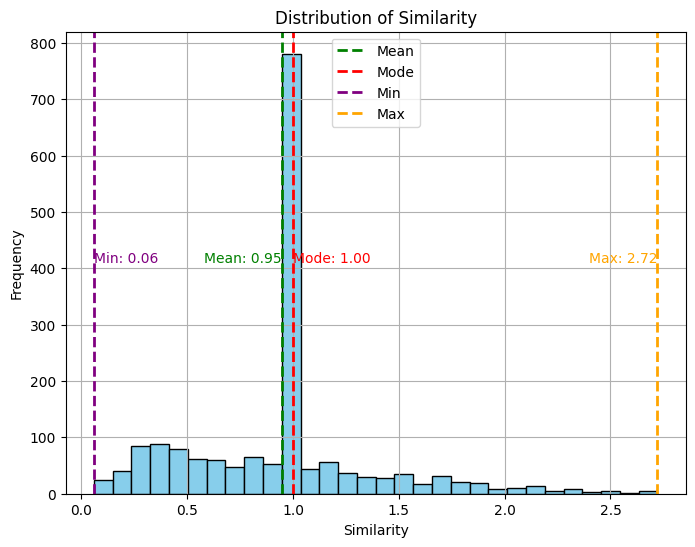

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated the 'similarity' column as shown in the previous code.

# Calculate statistics
mean_similarity = frequent_items_with_support['similarity'].mean()
mode_similarity = frequent_items_with_support['similarity'].mode().iloc[0]
min_similarity = frequent_items_with_support['similarity'].min()
max_similarity = frequent_items_with_support['similarity'].max()

# Plot the distribution of the 'similarity' column
plt.figure(figsize=(8, 6))
plt.hist(frequent_items_with_support['similarity'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_similarity, color='green', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mode_similarity, color='red', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(min_similarity, color='purple', linestyle='dashed', linewidth=2, label='Min')
plt.axvline(max_similarity, color='orange', linestyle='dashed', linewidth=2, label='Max')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Similarity')
plt.legend()
plt.grid(True)

# Add text annotations for the statistics
plt.text(mean_similarity, plt.ylim()[1] * 0.50, f"Mean: {mean_similarity:.2f}", color='green', ha='right')
plt.text(mode_similarity, plt.ylim()[1] * 0.50, f"Mode: {mode_similarity:.2f}", color='red', ha='left')
plt.text(min_similarity, plt.ylim()[1] * 0.50, f"Min: {min_similarity:.2f}", color='purple', ha='left')
plt.text(max_similarity, plt.ylim()[1] * 0.50, f"Max: {max_similarity:.2f}", color='orange', ha='right')

plt.show()


In [ ]:
frequent_items_with_support

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support,length,similarity
527,(89805),0.014862,1,1.000000
274,(38535),0.010857,1,1.000000
10,(492),0.007062,1,1.000000
208,(27705),0.006008,1,1.000000
20,(1276),0.005481,1,1.000000
...,...,...,...,...
1267,"(90325, 69127)",0.000949,2,0.570557
672,(179276),0.000949,1,1.000000
666,(175276),0.000949,1,1.000000
658,(165916),0.000949,1,1.000000


In [ ]:
def similarity(itemset):
    max_similarity = 0
    min_similarity_item = None
    total_similarity = 0.0
    total_pairs = 0
    for i in itemset:
        for j in itemset:
            if i != j:  # Avoid comparing the same item
                similarity = combined_similarity(i,j,followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict)
                total_similarity +=similarity
                total_pairs += 1

                if similarity > max_similarity:
                    max_similarity = similarity
                    max_sim_itemss=(j,i)

                if min_similarity_item is None or similarity < min_similarity_item[2]:
                    min_similarity_item = (j,i, similarity)
    average_sim = total_similarity / total_pairs

    return average_sim,max_similarity, min_similarity_item,max_sim_itemss


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
single_items=[]
removed_items=[]
groups=[]
sets=[]
similarity_treshold=1
deleted_set=[]
# Loop over the rows and print the values in the 'itemsets' column
for index, row in frequent_items_with_support.iterrows():

    itemset_value = row['itemsets']
    itemset=set(itemset_value)
    sets.append(itemset)
    if len(itemset)==1: #=1
      single_items.append(itemset)
    elif len(itemset)==2: #=2
      average_sim,max_sim, min_sim_item,_=similarity(itemset)
      if average_sim>= similarity_treshold:
        groups.append(itemset)
      else:
        deleted_set.append(itemset)
    else: #>2
      print(itemset)
      average_sim,max_sim, min_sim_item,max_items=similarity(itemset)
      print(average_sim)
      print(itemset)
      print(max_sim)
      if average_sim>= similarity_treshold:
        groups.append(itemset)
      else:
        if max_sim<similarity_treshold:
          deleted_set.append(itemset)

        elif max_sim>=similarity_treshold:
          min_item=list(min_sim_item)
          new_set = set(itemset)
          max_items=list(max_items)
          while average_sim < similarity_treshold and len(new_set)!=2:
            print(new_set)
            if min_item[0] not in max_items :
              new_set.remove(min_item[0])
              removed_items.append(min_item[0])
              average_sim,max_sim, min_item,max_items=similarity(new_set)
              max_items=list(max_items)
              min_item=list(min_item)
            elif min_item[1] not in max_items :
              new_set.remove(min_item[1])
              removed_items.append(min_item[1])
              average_sim,max_sim, min_item,max_items=similarity(new_set)
              max_items=list(max_items)
              min_item=list(min_item)
            #if len(new_set)
          groups.append(new_set)
          print(new_set)
          print('')

#print(groups)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{103447, 89805, 64911}
1.4172129640108457
{103447, 89805, 64911}
2.042739517027792
{89805, 110903, 64911}
1.73702826865384
{89805, 110903, 64911}
1.8456937625837997
{42172, 89805, 110903}
1.7417866326068803
{42172, 89805, 110903}
2.7219275312407887
{80101, 89805, 100127}
0.3755568135907408
{80101, 89805, 100127}
0.5762334672773058
{42172, 89805, 64911}
1.3585955256515725
{42172, 89805, 64911}
1.7243345314363034
{80101, 1276, 89805}
0.637946561630191
{80101, 1276, 89805}
0.8574689516242452
{92274, 42172, 89805}
1.229587633052643
{92274, 42172, 89805}
2.5619450314117973
{56968, 89805, 11991}
1.4443661373000662
{56968, 89805, 11991}
2.670018648489396
{11991, 89805, 110903}
1.7876868857994095
{11991, 89805, 110903}
2.4823824759015025
{92274, 89805, 110903}
1.311803437971893
{92274, 89805, 110903}
1.7946534483102414
{26158, 89805, 67382}
0.8753469714947669
{26158, 89805, 67382}
1.0813930878556002
{26158, 89805, 67382}
{26158, 67382}

{35729, 89805, 64911}
1.6572321657429516
{35729, 89805, 6

In [ ]:
print(single_items)


[{89805}, {38535}, {492}, {27705}, {1276}, {62391}, {26158}, {54301}, {64911}, {9021}, {51181}, {6940}, {35375}, {80101}, {14957}, {149922}, {35376}, {69127}, {103447}, {15439}, {511}, {12751}, {44086}, {35729}, {108150}, {6241}, {13820}, {98204}, {33833}, {62195}, {4665}, {56426}, {16970}, {110903}, {67382}, {29542}, {74295}, {27311}, {116808}, {88838}, {3547}, {50305}, {75083}, {13139}, {8855}, {7501}, {86903}, {36417}, {56733}, {48039}, {49179}, {20385}, {30226}, {68285}, {37502}, {118365}, {973}, {60146}, {56022}, {3972}, {42172}, {43722}, {77579}, {50219}, {163806}, {89807}, {230370}, {80864}, {11991}, {136607}, {22924}, {34236}, {23940}, {113517}, {13808}, {43725}, {39885}, {35334}, {50250}, {103759}, {167}, {78701}, {86898}, {92274}, {5123}, {99038}, {8742}, {86501}, {95510}, {168870}, {119972}, {68758}, {5137}, {38819}, {39124}, {13798}, {144551}, {101238}, {51638}, {131538}, {24704}, {25661}, {17332}, {30225}, {79105}, {69891}, {15210}, {65210}, {2014}, {142114}, {9863}, {8542

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(removed_items)


[89805, 78701, 89805, 78701, 51181, 89805, 89805, 89805, 89805, 89805, 38535, 15439, 88838, 69127, 89805, 89805, 62391, 35334, 68285, 78701, 89805, 89805, 1276, 89805, 89805, 89805, 89805, 89805, 89805, 20273, 39885, 89805, 26158, 89805, 27705, 27705, 38535, 89805, 78701, 38535, 108150, 69127, 6150, 119972, 89805, 38535, 108150, 6150, 38535, 38535, 15439, 15439, 51181, 89805, 22924, 108150, 108150, 89805, 11852, 51181, 11953, 89805, 89805, 80101, 1276, 89805, 26158, 1276, 89805, 89805, 89805, 1276, 89805, 78701, 89805, 38535, 69127, 35334, 119972, 69127, 89807, 46117, 119972, 108150, 116808, 38535, 5137, 89805, 62391, 80101, 89805, 1276, 1276, 89805, 89805, 89805, 1276, 89805, 89805]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(groups)

[{89805, 64911}, {35729, 89805}, {89805, 110903}, {89805, 12751}, {89805, 11991}, {89805, 67382}, {110903, 64911}, {103447, 89805, 64911}, {103447, 64911}, {89805, 110903, 64911}, {42172, 110903}, {42172, 89805, 110903}, {119972, 35334}, {27705, 35375}, {20385, 89805}, {6940, 69127}, {89805, 13798}, {56426, 69127}, {108150, 35375}, {4665, 50219}, {492, 14957}, {92274, 42172}, {42172, 89805, 64911}, {1276, 7501}, {1276, 492}, {42172, 64911}, {92274, 42172, 89805}, {92274, 110903}, {13820, 89805}, {11953, 1276}, {92274, 64911}, {50250, 38819}, {39885, 64911}, {56968, 89805, 11991}, {26158, 67382}, {54301, 38535}, {11991, 89805, 110903}, {492, 973}, {92274, 89805, 110903}, {56426, 35375}, {11991, 110903}, {26158, 67382}, {56968, 11991}, {56426, 6940}, {35729, 89805, 64911}, {116808, 27705}, {89805, 39885, 64911}, {92274, 89805, 64911}, {26158, 13798}, {35729, 64911}, {35729, 89805, 12751}, {56968, 110903}, {6940, 35375}, {89805, 42172, 39885}, {50305, 56426}, {20385, 26158}, {89805, 35729

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(deleted_set)

[{89805, 26158}, {98204, 89805}, {89805, 103447}, {89805, 15439}, {42172, 89805}, {89805, 88838}, {1276, 89805}, {80101, 89805}, {89805, 51181}, {89805, 62391}, {92274, 89805}, {3547, 89805}, {89805, 39885}, {80101, 100127}, {22924, 89805}, {4665, 89805}, {492, 89805}, {89805, 54301}, {89805, 78701}, {56968, 89805}, {27705, 69127}, {3972, 89805}, {6241, 89805}, {89805, 511}, {6940, 108150}, {89805, 68285}, {89805, 100127}, {80101, 89805, 100127}, {1276, 80101}, {89805, 6150}, {89805, 27311}, {5123, 89805}, {108150, 38535}, {89805, 26398}, {89805, 14957}, {27705, 56426}, {6940, 38535}, {19604, 89805}, {89805, 44086}, {89805, 103759}, {80101, 1276, 89805}, {75083, 89805}, {50219, 89805}, {1276, 62391}, {1276, 15439}, {116808, 38535}, {56733, 69127}, {89805, 163806}, {5137, 89805}, {89805, 89807}, {89805, 101238}, {35376, 108150}, {116808, 34236}, {62195, 6940}, {1276, 89805, 15439}, {35729, 51181}, {116808, 69127}, {1276, 51181}, {35334, 38535}, {35334, 69127}, {89805, 127479}, {89805, 2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(sets)

[{89805}, {38535}, {492}, {27705}, {1276}, {62391}, {26158}, {54301}, {64911}, {9021}, {51181}, {6940}, {35375}, {80101}, {14957}, {149922}, {35376}, {69127}, {103447}, {15439}, {511}, {12751}, {44086}, {35729}, {89805, 64911}, {108150}, {6241}, {13820}, {98204}, {33833}, {62195}, {4665}, {35729, 89805}, {56426}, {16970}, {110903}, {67382}, {29542}, {89805, 26158}, {74295}, {89805, 110903}, {27311}, {116808}, {88838}, {3547}, {50305}, {75083}, {13139}, {8855}, {7501}, {86903}, {36417}, {56733}, {48039}, {49179}, {20385}, {98204, 89805}, {89805, 103447}, {30226}, {68285}, {37502}, {118365}, {973}, {60146}, {56022}, {89805, 15439}, {3972}, {42172}, {43722}, {77579}, {50219}, {163806}, {89807}, {230370}, {42172, 89805}, {80864}, {11991}, {136607}, {22924}, {34236}, {23940}, {113517}, {13808}, {89805, 12751}, {43725}, {89805, 88838}, {39885}, {35334}, {50250}, {103759}, {167}, {78701}, {86898}, {92274}, {5123}, {99038}, {1276, 89805}, {8742}, {86501}, {95510}, {168870}, {80101, 89805}, {11

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the list of unique items by converting sets to a list of items and then flattening the list
all_items = [item for itemset in sets for item in itemset] #0.00094
unique_items = list(set(all_items))

item_support = {item: all_items.count(item) / len(df_encoded) for item in unique_items}
# Set the threshold for support (e.g., 0.1)
threshold = 0.005

# Filter out items with support above the threshold
output_list = [item for item, support in item_support.items() if support > threshold]

print("Support for each item:")
print(item_support)

print("Items with support above the threshold ({}):".format(threshold))
print(output_list)

Support for each item:
{76290: 0.00010540739959945188, 5123: 0.00021081479919890376, 118274: 0.00010540739959945188, 35334: 0.003689258985980816, 69127: 0.007167703172762728, 6150: 0.0007378517971961631, 2062: 0.00021081479919890376, 35344: 0.0004216295983978075, 5137: 0.002635184989986297, 30225: 0.0023189627911879415, 30226: 0.00031622219879835566, 103447: 0.0039000737851797194, 24599: 0.00010540739959945188, 49179: 0.00021081479919890376, 22555: 0.00010540739959945188, 54301: 0.001791925793190682, 103451: 0.00010540739959945188, 46117: 0.000843259196795615, 8742: 0.00031622219879835566, 45605: 0.00010540739959945188, 33833: 0.00010540739959945188, 132650: 0.00010540739959945188, 50219: 0.0005270369979972594, 50218: 0.00010540739959945188, 26158: 0.009275851164751766, 35375: 0.004005481184779171, 35376: 0.0029514071887846525, 44086: 0.0004216295983978075, 4665: 0.0023189627911879415, 27705: 0.004532518182776431, 14907: 0.0005270369979972594, 25661: 0.00031622219879835566, 37443: 0.00

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


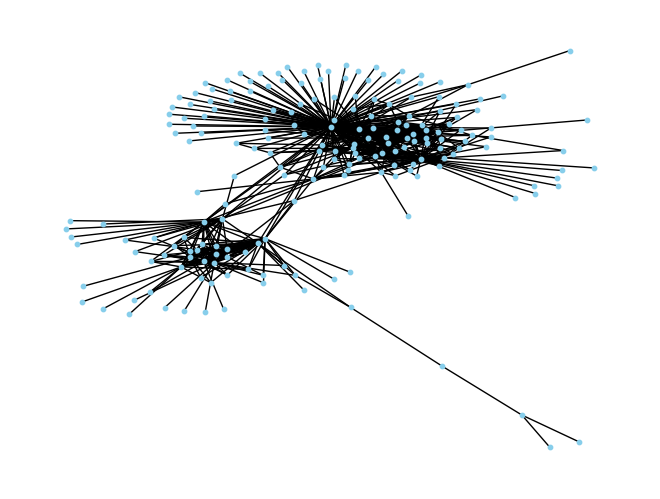

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have a list named 'sets' containing sets of different lengths

# Step 1: Create an empty graph
G = nx.Graph()

# Step 2 and 3: Loop through the sets and add nodes and edges
for itemset in sets:

    if len(itemset) == 1:
        # Add a single node
        node = itemset.pop()  # Extract the only item from the set
        if node in output_list:
          G.add_node(node)
        #G.add_node(node)
    elif len(itemset) == 2:
        # Add an edge between two nodes
        node1, node2 = itemset  # Unpack the set into two nodes
        G.add_edge(node1, node2)
    else:
        # Add edges between all pairs of nodes in the set
        for node1 in itemset:
            for node2 in itemset:
                if node1 != node2:
                    i=1
                    G.add_edge(node1, node2)

# Step 4: Visualize the graph
pos = nx.spring_layout(G, seed=42)  # You can use different layout algorithms
nx.draw(G, pos, with_labels=False, node_size=10, node_color='skyblue')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


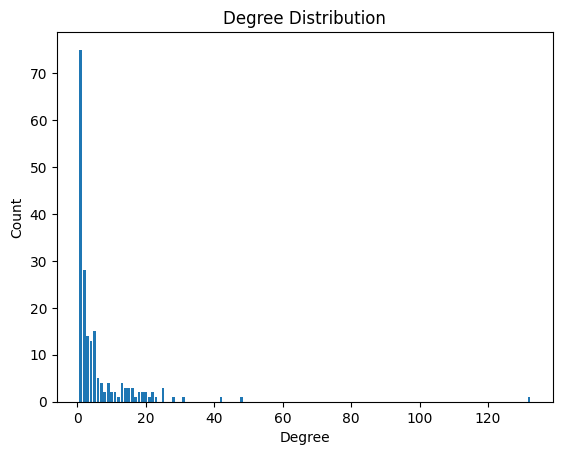

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the graph 'G'

# Step 1: Calculate the degrees of all nodes in the graph
degrees = dict(G.degree())

# Step 2: Count the occurrences of each degree value
degree_counts = {}
for node, degree in degrees.items():
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

# Step 3: Plot the degree distribution
degrees, counts = zip(*sorted(degree_counts.items()))
plt.bar(degrees, counts)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-75-80ad3d43725a>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(communities))


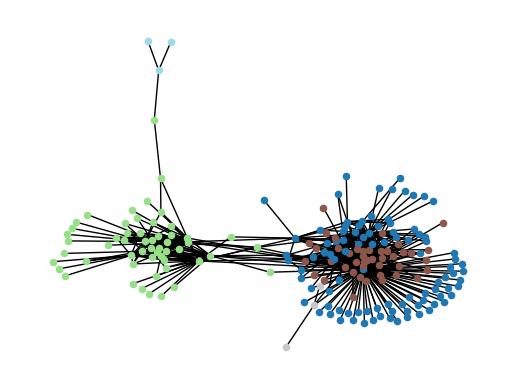

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community



# Detect communities using the Louvain algorithm
communities = community.greedy_modularity_communities(G)

# Create a dictionary to store community membership for each node
membership = {}
for idx, comm in enumerate(communities):
    for node in comm:
        membership[node] = idx

# Generate a list of colors for each community
colors = plt.cm.get_cmap('tab20', len(communities))

# Draw the graph with different colors for each community
pos = nx.spring_layout(G)
for node in G.nodes():
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=colors(membership[node]), node_size=20)

nx.draw_networkx_edges(G, pos)
plt.axis("off")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-76-2b132695a77b>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(communities))


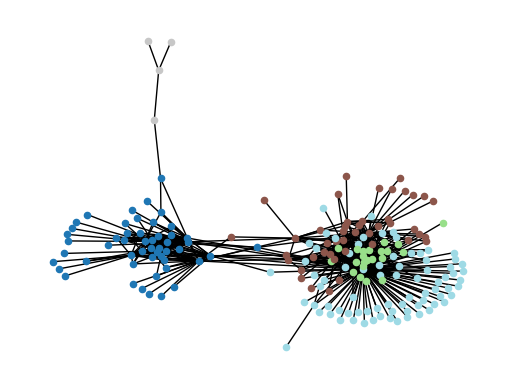

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community



# Detect communities using the Louvain algorithm
communities = community.louvain_communities(G)

# Create a dictionary to store community membership for each node
membership = {}
for idx, comm in enumerate(communities):
    for node in comm:
        membership[node] = idx

# Generate a list of colors for each community
colors = plt.cm.get_cmap('tab20', len(communities))

# Draw the graph with different colors for each community
#pos = nx.spring_layout(G)
for node in G.nodes():
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=colors(membership[node]), node_size=20)

nx.draw_networkx_edges(G, pos)
plt.axis("off")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-64-f6061e95f109>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(communities))
/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if

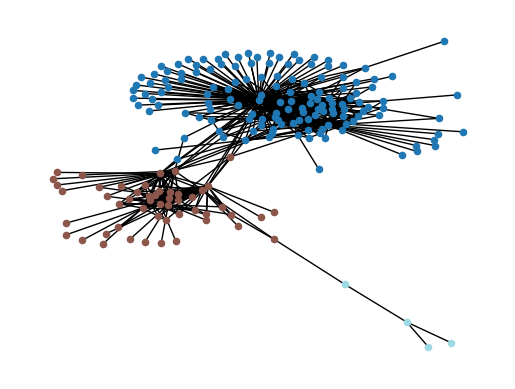

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community



# Detect communities using the Louvain algorithm
communities = community.label_propagation_communities(G)

# Create a dictionary to store community membership for each node
membership = {}
for idx, comm in enumerate(communities):
    for node in comm:
        membership[node] = idx

# Generate a list of colors for each community
colors = plt.cm.get_cmap('tab20', len(communities))

# Draw the graph with different colors for each community
#pos = nx.spring_layout(G)
for node in G.nodes():
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=colors(membership[node]), node_size=20)

nx.draw_networkx_edges(G, pos)
plt.axis("off")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


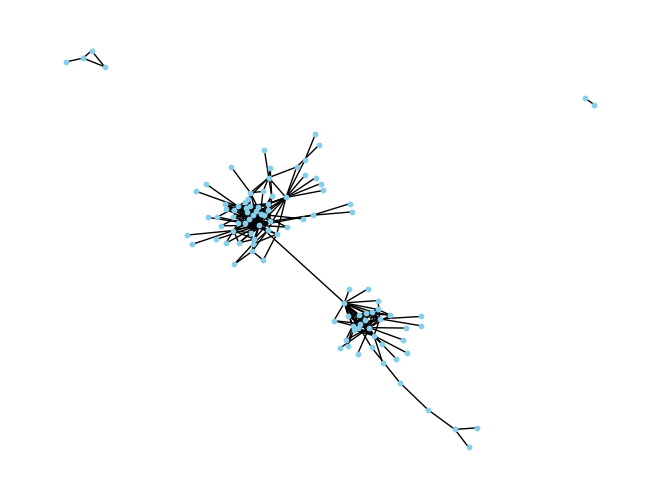

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have a list named 'sets' containing sets of different lengths

# Step 1: Create an empty graph
G = nx.Graph()

# Step 2 and 3: Loop through the sets and add nodes and edges
for itemset in groups:
    if len(itemset) == 1:
        # Add a single node
        node = itemset.pop()  # Extract the only item from the set
        G.add_node(node)
    elif len(itemset) == 2:
        # Add an edge between two nodes
        node1, node2 = itemset  # Unpack the set into two nodes
        G.add_edge(node1, node2)
    else:
        # Add edges between all pairs of nodes in the set
        for node1 in itemset:
            for node2 in itemset:
                if node1 != node2:
                    G.add_edge(node1, node2)

# Step 4: Visualize the graph
pos = nx.spring_layout(G, seed=42)  # You can use different layout algorithms
nx.draw(G, pos, with_labels=False, node_size=10, node_color='skyblue')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-60-f6061e95f109>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(communities))


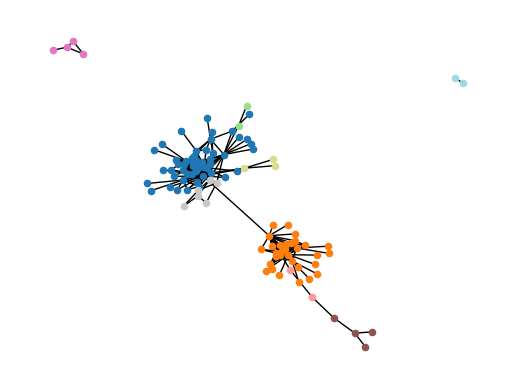

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community



# Detect communities using the Louvain algorithm
communities = community.label_propagation_communities(G)

# Create a dictionary to store community membership for each node
membership = {}
for idx, comm in enumerate(communities):
    for node in comm:
        membership[node] = idx

# Generate a list of colors for each community
colors = plt.cm.get_cmap('tab20', len(communities))

# Draw the graph with different colors for each community
#pos = nx.spring_layout(G)
for node in G.nodes():
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=colors(membership[node]), node_size=20)

nx.draw_networkx_edges(G, pos)
plt.axis("off")
plt.show()

In [ ]:
communities

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_values([{76290, 5123, 118274, 6150, 2062, 5137, 103447, 24599, 49179, 22555, 54301, 103451, 46117, 45605, 33833, 50219, 26158, 44086, 4665, 14907, 25661, 37443, 121414, 16970, 11852, 15439, 4177, 118365, 6241, 10339, 5226, 14957, 92274, 36989, 128, 12928, 2177, 24704, 51334, 56968, 19604, 3228, 15521, 5281, 677, 84647, 53930, 175276, 27311, 98992, 11953, 175283, 42172, 68285, 98493, 42180, 42182, 43722, 89805, 43725, 89807, 44246, 11991, 3287, 4322, 80101, 20718, 173809, 40185, 168699, 1276, 50948, 88838, 59654, 8966, 255249, 6418, 35604, 95510, 28951, 26398, 100127, 37162, 20273, 67382, 110903, 251706, 248648, 75083, 7501, 103759, 13139, 14166, 176473, 27483, 29542, 78701, 170862, 137587, 101238, 14721, 168835, 3972, 23940, 94719, 22924, 64911, 35729, 3994, 98204, 27036, 4509, 20385, 16801, 168870, 48039, 17332, 51638, 62391, 439, 51640, 62906, 137674, 39885, 973, 12751, 3533, 146381, 241617, 3547, 163806, 86501, 13798, 184805, 42984, 492, 51181, 26092, 13808, 127479, 13820, 511}

In [ ]:
list(communities)[2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{9021, 38819, 50218, 71888}

In [ ]:
import pandas as pd

# Assuming you already have your dataframe named 'DF'
# If not, create it with your data

# Extract unique values from ID1 and ID2
unique_values_id1 = DF['ID1'].unique()
unique_values_id2 = DF['ID2'].unique()

# Concatenate and sort the unique values
unique_values = sorted(set(unique_values_id1) | set(unique_values_id2))

# Create a new dataframe with the unique values
new_df = pd.DataFrame({'ID': unique_values, 'cluster': None})

# Display the new dataframe
new_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,cluster
0,1,None
1,2,None
2,3,None
3,4,None
4,5,None


In [ ]:
cluster_names = {idx: f'cluster{idx+1}' for idx, comm in enumerate(communities)}
cluster_names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{0: 'cluster1', 1: 'cluster2', 2: 'cluster3'}

In [ ]:
from tqdm import tqdm

# communities is a list of lists containing the IDs of each community
# For example, communities = [['ID1', 'ID2', ...], ['ID3', 'ID4', ...], ...]

# Create a dictionary to map community index to cluster name
cluster_names = {idx: f'cluster{idx+1}' for idx, comm in enumerate(communities)}

# Get the total number of records in new_df
total_records = len(new_df)

# Create a progress bar using tqdm
progress_bar = tqdm(total=total_records, desc="Processing", unit="record", dynamic_ncols=True)

# Loop over new_df and update the 'cluster' column using the community names
for index, row in new_df.iterrows():
    max_similarity = 0
    max_cluster = None

    # Calculate similarity for each cluster and find the cluster with the max similarity
    for cluster_num, cluster_list in enumerate(communities):
        for cluster_id in cluster_list:
            # sim = similarity(row['ID'], cluster_id)
            sim = combined_similarity(row['ID'], cluster_id, followers_dict, followings_dict, reply_dict, retweet_dict, mention_dict)

            if sim > max_similarity:
                max_similarity = sim
                max_cluster = cluster_num

    # If the max_cluster is not None, assign the corresponding cluster name to the 'cluster' column
    if max_cluster is not None:
        cluster_name = cluster_names[max_cluster]
        new_df.at[index, 'cluster'] = cluster_name

    # Update the progress bar for every 1000 records
    if index % 1000 == 0:
        progress_bar.update(1000)
        progress_bar.set_description(f"Processing ({index}/{total_records})")
        progress_bar.refresh()

# Close the progress bar
progress_bar.close()

# Print the final dataframe
new_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Processing (45000/45756): : 46000record [10:03, 76.18record/s]

           ID   cluster
0           1  cluster1
1           2  cluster1
2           3  cluster1
3           4  cluster1
4           5  cluster1
...       ...       ...
45751  437410  cluster2
45752  440356  cluster1
45753  441445  cluster2
45754  442005  cluster1
45755  443773  cluster2

[45756 rows x 2 columns]


In [ ]:
cluster_counts = new_df['cluster'].value_counts()

cluster_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


cluster1    27905
cluster2    16004
cluster3     1663
Name: cluster, dtype: int64

In [ ]:
import pandas as pd

# Assuming you have your DataFrame named 'new_df'
# If not, replace 'new_df' with the actual name of your DataFrame

# Check if any column has NaN value
has_nan = new_df.isna().any()

# Print the result
has_nan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID         False
cluster     True
dtype: bool

In [ ]:
nan_counts = new_df.isna().sum()
nan_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID           0
cluster    184
dtype: int64

In [ ]:
import pandas as pd
import networkx as nx
def new_combined_similarity(ID1, ID2, followers_dict,followings_dict, reply_dict,retweet_dict,mention_dict,graph):

    sc1 = S1(ID1, ID2, followers_dict)+nx.shortest_path_length(graph, source=ID1, target=ID2)
    sc2 = s2(ID1, ID2, followings_dict)
    sc3 = s3(ID1, ID2, followers_dict)
    sc4 = S4(ID1, ID2, mention_dict)
    sc5 = S5(ID1, ID2, reply_dict)
    sc6 = S6(ID1, ID2, retweet_dict)

    combined_score = sc1 + sc2 + sc3 + sc4 + sc5 + sc6
    return combined_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

# Assuming you have your DataFrame named 'new_df'
# If not, replace 'new_df' with the actual name of your DataFrame

# Extract rows with NaN values in the entire DataFrame
nan_df = new_df[new_df.isna().any(axis=1)]

# Print the new DataFrame
nan_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,cluster
772,1074,None
1114,1592,None
1144,1704,None
3721,7811,None
6057,14345,None
...,...,...
45648,392564,None
45717,410645,None
45718,411068,None
45727,416294,None


In [ ]:
unique_ids = nan_df['ID'].unique()
print(unique_ids)

[  1074   1592   1704   7811  14345  21489  22157  32848  34076  41482
  45922  49029  51056  55315  64693  68697  71714  72951  78917  80474
  84357  87043  87389  90375  92114  92753  92761  93632  94598  94602
  97440  97970  99296  99304 100216 102219 103314 104579 105254 107399
 112326 112496 112975 114092 114529 116939 118678 120277 120576 123964
 129609 132502 133420 133726 136508 136510 136586 140362 140364 142681
 144001 149368 149374 150073 150128 150758 153324 153392 155128 156193
 169687 171473 180299 180301 186169 189031 192900 197537 199549 201680
 202591 204502 206513 207485 207521 208413 210997 216804 217425 218609
 223677 224835 226313 226316 226317 226395 229315 231863 231886 233389
 237160 239070 239710 239724 243756 248077 249730 250704 250708 252987
 254930 255527 255646 256314 259879 262250 262546 262547 263915 264516
 266636 267296 269993 271003 273711 277867 281831 288555 291097 293104
 293419 296140 296675 296698 298446 298646 300390 302137 303133 305249
 31212

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import networkx as nx

# Replace the path with the correct one if needed
file_path = '/content/drive/MyDrive/Subgraph.csv'

# Read the file into a DataFrame
DF = pd.read_csv(file_path)

# Create a directed graph from the edge list
G = nx.from_pandas_edgelist(DF, source='ID1', target='ID2', create_using=nx.DiGraph())



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from tqdm import tqdm

# communities is a list of lists containing the IDs of each community
# For example, communities = [['ID1', 'ID2', ...], ['ID3', 'ID4', ...], ...]

# Create a dictionary to map community index to cluster name
cluster_names = {idx: f'cluster{idx+1}' for idx, comm in enumerate(communities)}



# Loop over new_df and update the 'cluster' column using the community names
for index, row in new_df.iterrows():
  if row['cluster'] is None:
        # Create a dictionary to store the score for each cluster
        cluster_scores = {}

        # Find the neighbors using the 'ID' of the current row
        neighbors = DF.loc[DF['ID1'] == row['ID'], 'ID2'].tolist()

        # Calculate similarity score for each neighbor and cluster
        for neighbor_id in neighbors:
            for cluster_num, cluster_list in enumerate(communities):
                for cluster_id in cluster_list:
                    sim = combined_similarity(neighbor_id, cluster_id, followers_dict, followings_dict, reply_dict, retweet_dict, mention_dict)
                    #similarity(neighbor_id, cluster_id)

                    # Add the similarity score to the corresponding cluster
                    if cluster_num in cluster_scores:
                        cluster_scores[cluster_num] += sim
                    else:
                        cluster_scores[cluster_num] = sim
        if neighbors==[]:
          new_df.at[index, 'cluster'] = 'isolated'
          print('no neighbour')
        else:
          # Find the cluster with the highest score
          max_cluster = max(cluster_scores, key=cluster_scores.get)

          # Assign the cluster with the highest score to the 'cluster' column for the current row
          new_df.at[index, 'cluster'] = f'cluster{max_cluster+1}'
# Print the final dataframe
new_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


no neighbour
no neighbour
no neighbour
no neighbour
no neighbour
no neighbour
no neighbour
no neighbour
no neighbour


,ID,cluster
0,1,cluster1
1,2,cluster1
2,3,cluster1
3,4,cluster1
4,5,cluster1


In [ ]:
cluster_counts = new_df['cluster'].value_counts()

cluster_counts.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


cluster1    28038
cluster2    16046
cluster3     1663
isolated        9
Name: cluster, dtype: int64